### 在癌症數據集上應用特徵選取
數據集本身有 30 個特徵，額外增加 30 個雜訊特徵，希望藉由特徵選取挑出這些雜訊

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [3]:
import numpy as np
# 設定亂數種子數，並產生雜訊特徵
rng = np.random.RandomState(0)
noise = rng.normal(size=(len(cancer.data), 30))

# 增加雜訊特徵到原始數據集內
X_noise = np.hstack([cancer.data, noise])

# 切割數據集(測試集佔 20%)
X_train, X_test, y_train, y_test = train_test_split(X_noise, 
                                                    cancer.target, 
                                                    random_state=0, 
                                                    test_size=.2)
X_train[:1]

array([[ 1.00500000e+01,  1.75300000e+01,  6.44100000e+01,
         3.10800000e+02,  1.00700000e-01,  7.32600000e-02,
         2.51100000e-02,  1.77500000e-02,  1.89000000e-01,
         6.33100000e-02,  2.61900000e-01,  2.01500000e+00,
         1.77800000e+00,  1.68500000e+01,  7.80300000e-03,
         1.44900000e-02,  1.69000000e-02,  8.04300000e-03,
         2.10000000e-02,  2.77800000e-03,  1.11600000e+01,
         2.68400000e+01,  7.19800000e+01,  3.84000000e+02,
         1.40200000e-01,  1.40200000e-01,  1.05500000e-01,
         6.49900000e-02,  2.89400000e-01,  7.66400000e-02,
         2.67146361e+00, -1.26158317e+00,  6.33755232e-02,
        -6.12250888e-01,  7.06435599e-01, -1.49067507e-01,
         3.21450907e-01, -3.42670374e-01,  3.45725855e-01,
        -4.68280277e-01,  2.91891616e-01,  4.65050770e-01,
         1.24974945e-01,  5.59933547e-01,  6.78623614e-01,
        -4.04554626e-01,  6.69244255e-01,  4.93822497e-01,
         1.22093965e+00,  1.03687938e-01,  6.97564650e-0

In [4]:
from sklearn.feature_selection import f_classif, SelectPercentile

# 選取 50% 的特徵
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_sel.shape: {}".format(X_train_sel.shape))

X_train.shape: (455, 60)
X_train_sel.shape: (455, 30)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False  True False False False False False False False  True  True
 False False False False False False False False False  True False False]



Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


([], <a list of 0 Text yticklabel objects>)

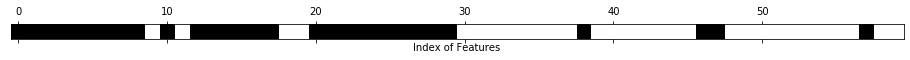

In [5]:
import matplotlib.pyplot as plt
# 找出那些特徵被挑選出來
mask = selector.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Index of Features')
plt.yticks(())

In [6]:
# 比較邏輯斯迴歸在所有特徵、選取特徵的效能
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 對特徵進行標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 邏輯斯迴歸
lr = LogisticRegression()
# 所有特徵(60個)
lr.fit(X_train_std, y_train)
print("套用在所有特徵(60個)上的分數：%.3f" % lr.score(X_test_std, y_test))

# 對特徵進行標準化
X_test_sel = selector.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_sel)
X_train_sel_std = scaler.transform(X_train_sel)
X_test_sel_std = scaler.transform(X_test_sel)

# 選取的特徵(30個)

lr.fit(X_train_sel_std, y_train)
print("套用在選取特徵(30個)上的分數：%.3f" % lr.score(X_test_sel_std, y_test))

套用在所有特徵(60個)上的分數：0.956
套用在選取特徵(30個)上的分數：0.965
